In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import relo
import matplotlib.animation as anim
%matplotlib widget
from matplotlib.animation import FuncAnimation

In [2]:
n = 3 # количество вершин треугольника Рело
center = np.array([0.,0.]) # центр треугольника Рело
r = 10 # ширина треугольника Рело
N = 100 # количество точек для описания стороны треугольника Рело
relo_matrix = relo.regular_polygon_Relo(n=3, r=r, center=center, N=N)
relo_matrix[0::30]

array([[-2.88675135,  5.        ],
       [-4.01452177,  2.04806668],
       [-4.16488195, -1.108382  ],
       [-3.32281726, -4.15415013],
       [-0.7869459 , -4.77705564],
       [ 2.15898152, -3.63368866],
       [ 4.60105334, -1.62818082],
       [ 5.19719663,  0.88640681],
       [ 2.95681834,  3.11496724],
       [ 0.13291424,  4.53318518]])

In [3]:
def square_vertices(a:int, center:list=[0,0]):
    """
    Do:
        calc coord list of square verticesc
        
    Args:
        a - side len
        center - center coords
        
    Return:
        coords list of square vertices
    """
    vectors = (a / 2) * np.array([[1,1], [1,-1], [-1, -1], [-1,1], [1,1]])
    return np.array(center) + vectors

In [4]:
square_matrix = square_vertices(r) # определили координты вершин квадрата
square_matrix

array([[ 5.,  5.],
       [ 5., -5.],
       [-5., -5.],
       [-5.,  5.],
       [ 5.,  5.]])

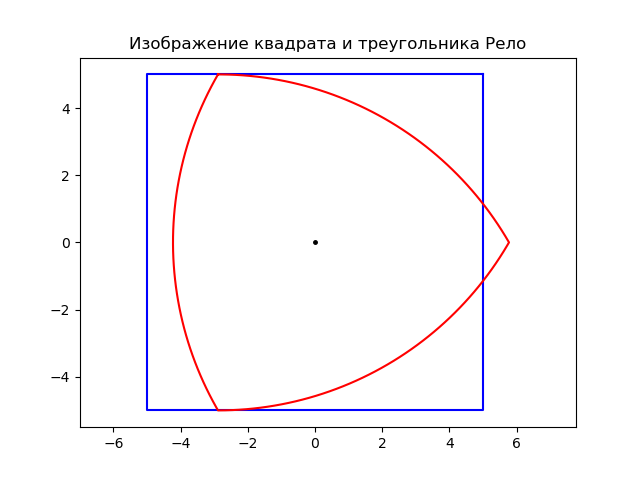

In [5]:
fig1 = plt.figure()
plt.title("Изображение квадрата и треугольника Рело")
plt.plot(square_matrix[:,0],square_matrix[:,1],'b-')
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal')
plt.show()

In [6]:
x1 = np.min(square_matrix[:,0]) # абсцисса левой вершины квадрата
x2 = np.min(relo_matrix[:,0]) # абсцисса крайней левой стороны треугольника Рело
shift_0x = np.array([x2 - x1, 0]) # вектор смещения по оси 0x
shift_0x

array([0.77364255, 0.        ])

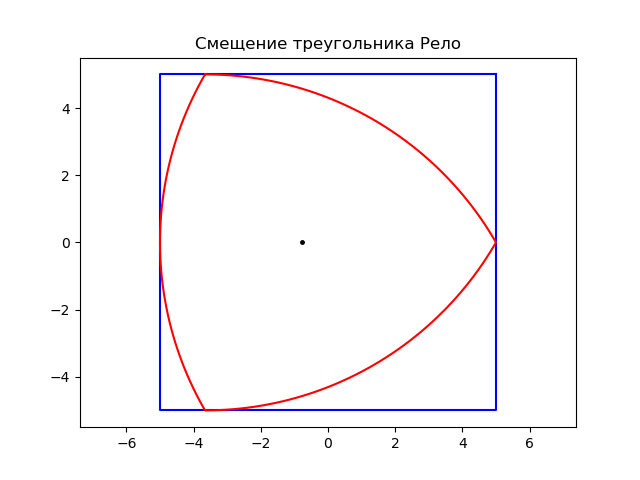

In [7]:
relo_matrix_shifted = relo_matrix - shift_0x
center_shifted = center - shift_0x 

fig2 = plt.figure()
plt.title("Смещение треугольника Рело")
plt.plot(square_matrix[:,0],square_matrix[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center_shifted[0],center_shifted[1],'k.',markersize=5)
plt.axis('equal')
plt.show()

In [8]:
N_frames = 100

In [9]:
# разбиваем угол вращения на N_frames кадров
t_center = np.linspace(-np.pi, np.pi, N_frames) 

# определеям координаты центра треугольника Рело при поступательном вращении
center_frame = shift_0x[0] * np.transpose([np.cos(t_center), np.sin(t_center)])

In [10]:
frame = 0
relo_matrix_shifted = relo_matrix + center_frame[frame]

(np.float64(-5.5),
 np.float64(5.5),
 np.float64(-5.5),
 np.float64(5.500000000000001))

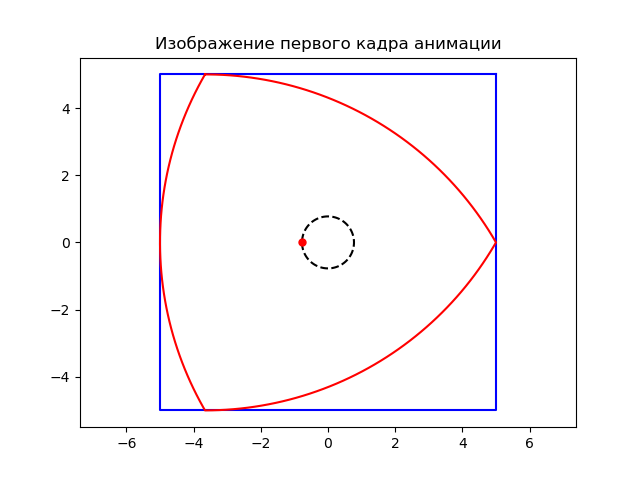

In [11]:
fig3 = plt.figure()
plt.title("Изображение первого кадра анимации")
plt.plot(square_matrix[:,0], square_matrix[:,1], 'b') # квадрат
plt.plot(relo_matrix_shifted[:,0], relo_matrix_shifted[:,1], 'r-') # треугольник Рело
plt.plot(center_frame[:,0], center_frame[:,1], 'k--') # траетория вращения
plt.plot(center_frame[frame,0], center_frame[frame,1], 'r.', markersize=10) # центр треугольника Рело
plt.axis('equal')

In [12]:
def draw_frame(r:float, N_frames:int, frame:int = 0):
    """
    Do:
        draw frame for animation
        
    Args:
        r -radius of Relo polygon
        N_frames - amount of frames for animation
        frame - number of animation frame
        
    Return:
        None
    """
    # определяем стороны треугольника Рело
    relo_matrix = relo.regular_polygon_Relo(n=3, r=r, center=(0,0), N=N_frames)
    
    # определяем вершины квадрата
    square_matrix = square_vertices(r)
    
    x1 = np.min(square_matrix[:,0]) # абсцисса левой вершины квадрата 
    x2 = np.min(relo_matrix[:,0]) # абсцисса крайней левой стороны треугольника Рело
    shift_0x = np.array([x2 - x1, 0]) # вектор смещения по оси 0x
    t_center = np.linspace(-np.pi, np.pi, N_frames) # разбиваем угол вращения на N_frames кадров

    # определеям координаты центра треугольника Рело при поступательном вращении
    center_frame = shift_0x[0] * np.transpose([np.cos(t_center), np.sin(t_center)])
    
    # смещаем "контур" (стороны) треугольника рело
    relo_matrix_shifted = relo_matrix + center_frame[frame]
    
    # изображаем результат
    plt.plot(square_matrix[:,0], square_matrix[:,1], 'b-') # квадрат
    plt.plot(relo_matrix_shifted[:,0], relo_matrix_shifted[:,1], 'r-') # треугольник Рело  
    plt.plot(center_frame[:,0], center_frame[:,1], 'k--') # траетория вращения
    plt.plot(center_frame[frame,0], center_frame[frame,1], 'r.', markersize=10) # центр треугольника Рело
    plt.axis('equal')

    return None 

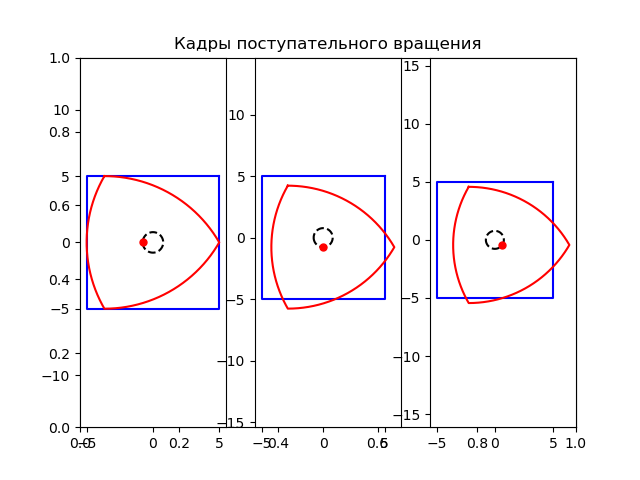

In [13]:
fig4 = plt.figure()
plt.title("Кадры поступательного вращения")
N_frames = 100
plt.subplot(1,3,1)
draw_frame(r=r, N_frames=N_frames)
plt.subplot(1,3,2)
draw_frame(r=r, N_frames=N_frames, frame=25)
plt.subplot(1,3,3)
draw_frame(r=r, N_frames=N_frames, frame=40)

In [35]:
def at_frame_Relo(frame):
    """
        Переопределяет координаты сторон и центра треугольника Рело
    """
    # переопределяем центр треугольника Рело
    center_Relo.set_data(center_frame[frame, 0], center_frame[frame, 1])
    
    # смещаем "контур" (стороны) треугольника Рело
    relo_matrix_shifted_coords = relo_matrix + center_frame[frame]
    relo_matrix_shifted.set_data(relo_matrix_shifted_coords[:,0], relo_matrix_shifted_coords[:,1])

    

    return None

In [38]:
def A(frame):
    at_frame_Relo(frame)
    plt.plot(relo_matrix_shifted[:,0], relo_matrix_shifted[:,1], 'r-')
    print(1)

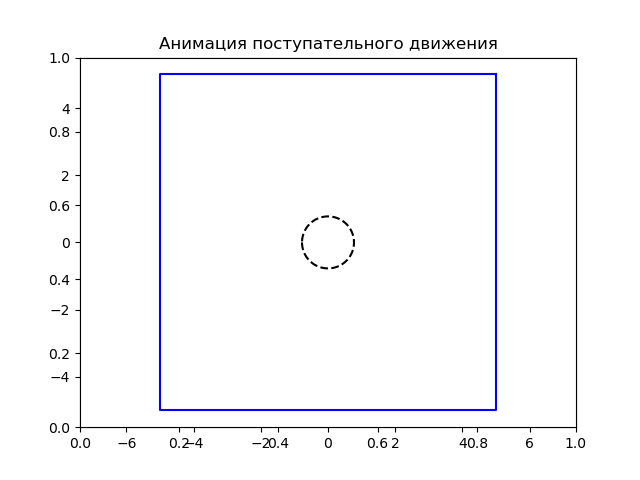

In [39]:
fig5 = plt.figure() # создаем новую графическую область
plt.title("Анимация поступательного движения")
ax5 = plt.axes() 
r=10
N_frames=100
plt.axis([-0.75*r, 0.75*r, -0.75*r, 0.75*r])

frames_list = list(range(0, N_frames + 1))

def init_Relo(r:int, center:tuple = (0,0), N_frames:int = 100):
    """
        Инициализация (подготовка) графической области
    """
    # переменные сделаны глобальными, чтобы были видны функции at_frame_Relo
    global relo_matrix, relo_matrix_shifted, center_frame, center_Relo
       
    # подготавливаем графические объекты (стороны и центр треугольника Рело) для анимации
    relo_matrix_shifted, = ax5.plot([],[],'r-')
    center_Relo, = ax5.plot([],[],'r.')
    
    # определяем стороны треугольника Рело
    relo_matrix = relo.regular_polygon_Relo(n=3, r=r, center=center, N=N_frames)
    
    # определяем вершины квадрата
    square_matrix = square_vertices(r) 
    
    x1 = np.min(square_matrix[:,0]) # абсцисса левой вершины квадрата 
    x2 = np.min(relo_matrix[:,0]) # абсцисса крайней левой стороны треугольника Рело
    shift_0x = np.array([x2 - x1, 0]) # вектор смещения по оси 0x
    t_center = np.linspace(-np.pi, np.pi, N_frames) # разбиваем угол вращения на N_frames кадров

    # определеям координаты центра треугольника Рело при поступательном вращении
    center_frame = shift_0x[0] * np.transpose([np.cos(t_center), np.sin(t_center)])
    
    plt.plot(square_matrix[:,0], square_matrix[:,1], 'b-') 
    plt.plot(center_frame[:,0], center_frame[:,1], 'k--') 
    plt.axis('equal')
    
    return None
    
FuncAnimation(fig5, A, frames=frames_list, init_func=init_Relo(r=r, N_frames = 100), repeat=False, interval=100)

In [16]:
rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
rotate_matrix(np.pi)

array([[-1.0000000e+00,  1.2246468e-16],
       [-1.2246468e-16, -1.0000000e+00]])

In [17]:
theta = np.pi/3
matrix = rotate_matrix(theta)
relo_matrix_rotated = np.array([np.dot(matrix,row) for row in relo_matrix])
N_frames=100

(np.float64(-6.3508529610858835),
 np.float64(6.350852961085886),
 np.float64(-5.500000000000005),
 np.float64(5.500000000000001))

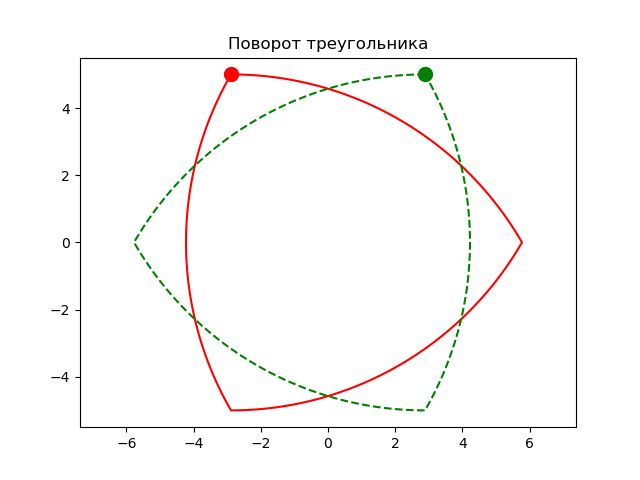

In [18]:
fig6 = plt.figure()
plt.title("Поворот треугольника")
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(relo_matrix[0,0],relo_matrix[0,1],'r.',markersize=20)
plt.plot(relo_matrix_rotated[:,0],relo_matrix_rotated[:,1],'g--')
plt.plot(relo_matrix_rotated[0,0],relo_matrix_rotated[0,1],'g.',markersize=20)
plt.axis('equal')

In [19]:
theta = np.linspace(0, 2*np.pi/3, N_frames)

(np.float64(-5.501733193293429),
 np.float64(5.536397059162015),
 np.float64(-5.50028119393714),
 np.float64(5.50590507267995))

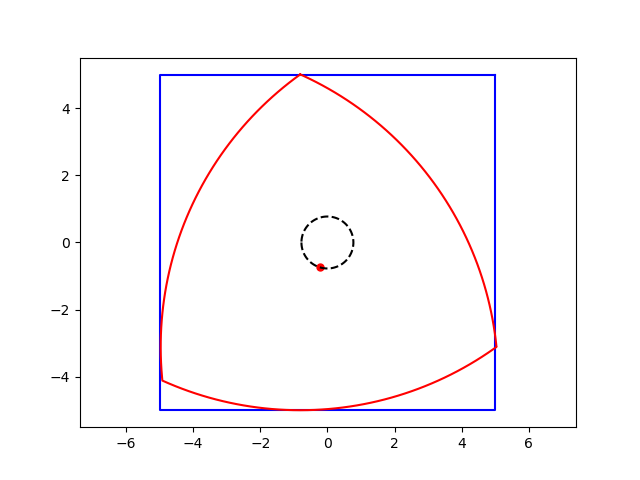

In [20]:
frame = 20

matrix = rotate_matrix(theta[frame])
relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
+ center_frame[frame])

fig7 = plt.figure()
plt.plot(square_matrix[:,0],square_matrix[:,1],'b-')
plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal')

In [21]:
def draw_frame_2(r:float, N_frames:int, frame:int = 0):
    """
    Do:
        draw frame for animation
        
    Args:
        r -radius of Relo polygon
        N_frames - amount of frames for animation
        frame - number of animation frame
        
    Return:
        None
    """
    # определяем стороны треугольника Рело
    relo_matrix = relo.regular_polygon_Relo(n=3, r=r, center=(0,0), N=N_frames)
    
    # определяем вершины квадрата
    square_matrix = square_vertices(r)
    
    x1 = np.min(square_matrix[:,0]) # абсцисса левой вершины квадрата 
    x2 = np.min(relo_matrix[:,0]) # абсцисса крайней левой стороны треугольника Рело
    shift_0x = np.array([x2 - x1, 0]) # вектор смещения по оси 0x
    t_center = np.linspace(-np.pi, np.pi, N_frames) # разбиваем угол вращения на N_frames кадров

    # поворачиваем стороны и центр треугольника Рело
    matrix = rotate_matrix(theta[frame]) # матрица поворота но угол theta
    center_frame = shift_0x[0] * np.transpose([np.cos(t_center), np.sin(t_center)]) # координаты центра треугольника Рело
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix]) + center_frame[frame]) # смещенный и повернутый треугольник Рело
    
    # изображаем результат
    plt.plot(square_matrix[:,0], square_matrix[:,1], 'b-') # квадрат
    plt.plot(relo_matrix_changed[:,0], relo_matrix_changed[:,1], 'r-') # треугольник Рело  
    plt.plot(center_frame[:,0], center_frame[:,1], 'k--') # траетория вращения
    plt.plot(center_frame[frame,0], center_frame[frame,1], 'r.', markersize=10) # центр треугольника Рело
    plt.axis('equal')

    return None

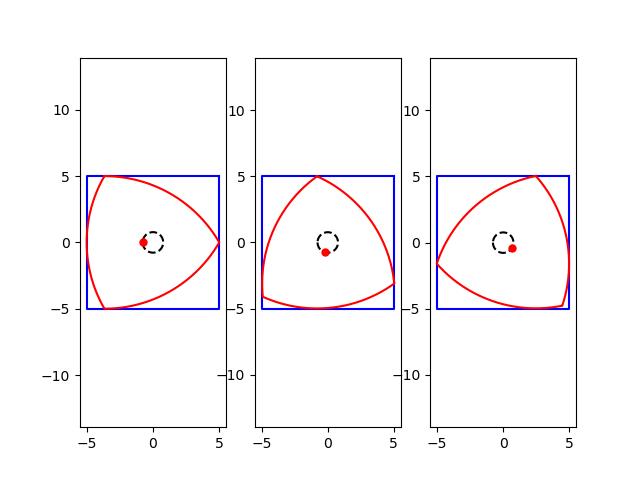

In [22]:
fig8 = plt.figure()

plt.subplot(1,3,1)
draw_frame_2(r=r, N_frames=N_frames)

plt.subplot(1,3,2)
draw_frame_2(r=r, N_frames=N_frames, frame=20)

plt.subplot(1,3,3)
draw_frame_2(r=r, N_frames=N_frames, frame=40)

In [23]:
def at_frame_Relo_2(frame):
    """
        Переопределяет координаты сторон и центра треугольника Рело
    """
    # переопределяем центр треугольника Рело
    center_Relo.set_data(center_frame[frame, 0], center_frame[frame, 1])
    
    # смещаем "контур" (стороны) треугольника Рело --> поступательное движение + поворот
    matrix = rotate_matrix(theta[frame]) # матрица поворота но угол theta
    relo_matrix_changed_coords = (np.array([np.dot(matrix,row) for row in relo_matrix]) + center_frame[frame]) # смещенный и повернутый треугольник Рело
    relo_matrix_changed.set_data(relo_matrix_changed_coords[:,0], relo_matrix_changed_coords[:,1])

    return None

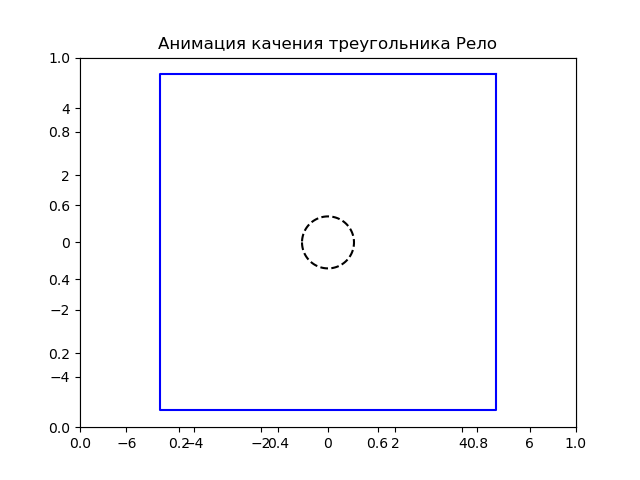

In [27]:
fig9 = plt.figure() # создаем новую графическую область
plt.title("Анимация качения треугольника Рело")
ax9 = plt.axes() 
plt.axis([-0.75*r, 0.75*r, -0.75*r, 0.75*r])

frames_list = list(range(0, N_frames + 1))

def init_Relo(r:int, center:list = (0,0), N_frames:int = 100):
    """
        Инициализация (подготовка) графической области
    """
    # переменные сделаны глобальными, чтобы были видны функции ar_frame_Relo
    global relo_matrix, relo_matrix_changed, center_frame, center_Relo, theta
     
    # определяем разбиение угла theta
    theta = np.linspace(0, 2*np.pi/3, N_frames)
       
    # подготавливаем графические объекты (стороны и центр треугольника Рело) для анимации
    relo_matrix_changed, = ax9.plot([],[],'r-')
    center_Relo, = ax9.plot([],[],'r.')
    
    # определяем стороны треугольника Рело
    relo_matrix = relo.regular_polygon_Relo(n=3, r=r, center=center, N=N_frames)
    
    # определяем вершины квадрата
    square_matrix = square_vertices(r) 
    
    x1 = np.min(square_matrix[:,0]) # абсцисса левой вершины квадрата 
    x2 = np.min(relo_matrix[:,0]) # абсцисса крайней левой стороны треугольника Рело
    shift_0x = np.array([x2 - x1, 0]) # вектор смещения по оси 0x
    t_center = np.linspace(-np.pi, np.pi, N_frames) # разбиваем угол вращения на N_frames кадров

    # определяем координаты центра треугольника Рело при поступательном вращении
    center_frame = shift_0x[0] * np.transpose([np.cos(t_center), np.sin(t_center)])
    
    plt.plot(square_matrix[:,0], square_matrix[:,1], 'b-') # квадрат
    plt.plot(center_frame[:,0], center_frame[:,1], 'k--') # траектория вращения
    plt.axis('equal')
    
    return None
    
FuncAnimation(fig9, at_frame_Relo_2, frames = frames_list, init_func = init_Relo(r = r, N_frames = 100), repeat = False, interval = 10)